### Regression Analysis 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

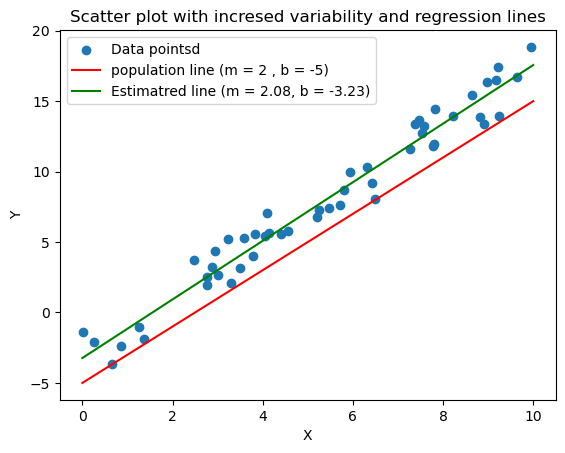

In [2]:
# Generate the data

x = 10 * np.random.rand(50)
y = 2 * x -5 + np.random.rand(50) * 4 

# Fit a linear regression model 
x = x.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)

# Calculate the predicted value 
y_pred = model.predict(x)

# Plot the scatter plot and regression lines 
plt.scatter(x,y,label="Data pointsd")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot with incresed variability and regression lines")

# Plot the actual population line 
x_line = np.linspace(0,10,100)
y_actual = 2* x_line -5 
plt.plot(x_line,y_actual,'r',label="population line (m = 2 , b = -5)")

# Plot the estimated regression line 
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line,y_estimated,'g',label=f"Estimatred line (m = {model.coef_[0]:.2f}, b = {model.intercept_:.2f})")

# Add legend and show the plot
plt.legend()
plt.show()


In [3]:
x = 10 * np.random.rand(50)
x

array([8.1048972 , 6.83479005, 9.12788667, 0.75678601, 3.36081844,
       4.36540869, 9.99546807, 9.02080763, 6.0344081 , 0.21407211,
       3.5519257 , 4.38805242, 0.94413244, 5.48906712, 8.87219881,
       9.07167809, 3.94136605, 8.85754408, 0.90091228, 7.92062885,
       2.795565  , 5.13295078, 6.48317878, 2.14388697, 9.51836961,
       6.17811529, 9.40102752, 6.93247091, 7.23523773, 2.3022467 ,
       4.35138874, 0.12408773, 1.11556765, 8.84723177, 3.06337417,
       8.93241891, 0.30395051, 0.06661136, 8.02291668, 4.65855053,
       1.4028485 , 7.39112714, 9.1399184 , 9.86652617, 3.72405697,
       9.78067869, 7.67857042, 4.37234426, 8.85465689, 1.94193086])

In [5]:
y = 2 * x -5 + np.random.rand(50) * 4 
y

array([13.81566249,  9.09261086, 13.38517823,  0.03955271,  4.82016718,
        7.27683935, 17.54633656, 16.57216309,  8.86858369, -2.11220361,
        5.03365336,  5.97275123, -2.64664201,  9.91016213, 14.05664426,
       14.36974494,  6.67087255, 15.04220596,  0.60239876, 12.26549906,
        2.54537981,  5.97869547, 10.05718164,  1.34779663, 14.28305616,
        8.82933076, 16.27870099, 10.06545926, 12.58762065,  3.13228458,
        6.43616836, -2.23935624,  0.44350128, 15.09232886,  3.10647404,
       14.64070891, -0.48434121, -4.66968779, 11.7202462 ,  7.53678236,
       -0.74371003, 10.01109143, 14.75343313, 15.36481402,  3.95112715,
       17.44650407, 13.93930434,  5.9516371 , 15.50089415, -0.13281305])

In [6]:
import pandas as pd 
import statsmodels.api as sm 

# Load the dataset 
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url,index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 4)

In [8]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [9]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model -> statistical analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.58e-96
Time:                        05:37:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [10]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model -> statistical analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 05 May 2023   Prob (F-statistic):           4.83e-98
Time:                        05:38:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [11]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Define the independent variables (add a constant for the intercept)
X = data[['TV']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model -> statistical analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.47e-42
Time:                        05:38:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0